In [1]:
## Descomente en caso de no tener spacy
# !pip install spacy
# !python -m spacy download es_core_news_md

In [2]:
import spacy
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


## Ejercicio 1

¿Los vectores de spaCy se calculan con las lematizaciones o con las palabras? Prueba con tres palabras, dos bien similares y otra bien distinta, y vé como se relacionan las distancias entre los vectores resultantes. 


In [3]:
## Voy a usar las palabras rata (de dos patas), gata (bajo la lluvia) y Llueve (sobre la ciudad)
palabras = ["Llueve", "Rata", "Gata"]

nlp = spacy.load('es_core_news_md')

vectores = [nlp(palabra).vector for palabra in palabras]

In [ ]:
distancias = {
    "llueve-rata": cosine(vectores[0], vectores[1]),
    "llueve-gata": cosine(vectores[0], vectores[2]),
    "rata-gata": cosine(vectores[1], vectores[2]),
}

In [5]:
for par, distancia in distancias.items():
    print(f"Distancia entre {par}: {distancia:.4f}")

Distancia entre llueve-rata: 1.0574
Distancia entre llueve-gata: 0.9615
Distancia entre rata-gata: 0.6993


Vemos que las palabras similares tienen menos distancia entre ellas que la distancia que hay entre cada una y la palabra distinta

## Ejercicio 2

¿Son estos iguales? Arma un dataset de 14 vectores, cada uno correspondiente a una frase del texto, resultante de usar las forma de llevar frases a vectores que vimos acá. Usa PCA para llevar ese dataset a dos dimensiones, y visualizar, tal como lo hicimos con los vectores tf-idf. ¿Vés alguna diferencia?

In [6]:
versos = ["Quizá porque mi niñez sigue jugando en tu playa", \
"Y escondido tras las cañas duerme mi primer amor", \
"Llevo tu luz y tu olor por donde quiera que vaya", \
"Y amontonado en tu arena guardo amor, juegos y penas",\
"Yo que en la piel tengo el sabor amargo del llanto eterno", \
"Que han vertido en ti cien pueblos, de Algeciras a Estambul", \
"Para que pintes de azul sus largas noches de invierno", \
"A fuerza de desventuras tu alma es profunda y oscura", \
"A tus atardeceres rojos se acostumbraron mis ojos", \
"Como el recodo al camino", \
"Soy cantor, soy embustero", \
"Me gusta el juego y el vino, tengo alma de marinero", \
"¿Qué le voy a hacer si yo nací en el Mediterráneo?", \
"Nací en el Mediterráneo"]

In [7]:
vectores = [nlp(verso).vector for verso in versos]

df_vectores = pd.DataFrame(vectores)

In [8]:
pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(df_vectores)

# Crear un DataFrame para los resultados de PCA
df_usando_spacy = pd.DataFrame(data=vectores_2d, columns=['X', 'Y'])
df_usando_spacy["num_frase"] = range(1, 15)
df_usando_spacy

,X,Y,num_frase
0,-6.665097,9.127045,1
1,-5.994858,1.683455,2
2,-10.273592,7.332881,3
3,-4.678353,0.530951,4
4,5.396340,1.027653,5
5,0.014103,-9.062030,6
6,0.342309,-15.167686,7
7,-6.427702,-1.904752,8
8,-11.041583,-11.418806,9
9,20.605980,6.483067,10


In [9]:
def spacy_tokenizer_esp(documento):
    resultado = []
    procesado = nlp(documento)
    for token in procesado: 
        if (token.is_stop == False and token.is_punct == False and token.lemma_.strip()!=''):
            resultado.append(token.lemma_)
    return resultado

In [10]:
tfidf_vectorizer = TfidfVectorizer(input = 'content', tokenizer = spacy_tokenizer_esp)

In [11]:
procesado = tfidf_vectorizer.fit_transform(versos)
denso = procesado.todense()
denso = denso.tolist()
tfidf_denso = pd.DataFrame(
    denso,columns=tfidf_vectorizer.get_feature_names_out())

/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
pca = PCA(n_components=2)
graficar = pca.fit_transform(tfidf_denso)

# Crear un DataFrame para los resultados de PCA
df_tfidf = pd.DataFrame(data=graficar, columns=['X', 'Y'])
df_tfidf["num_frase"] = range(1, 15)
df_tfidf

,X,Y,num_frase
0,-0.131791,-0.222237,1
1,-0.169268,0.310583,2
2,-0.131791,-0.222237,3
3,-0.197948,0.551467,4
4,-0.131791,-0.222237,5
5,-0.131791,-0.222237,6
6,-0.131791,-0.222237,7
7,-0.168492,0.287372,8
8,-0.131791,-0.222237,9
9,-0.131791,-0.222237,10


Text(0.5, 1.0, 'Resultados usando tf-idf')

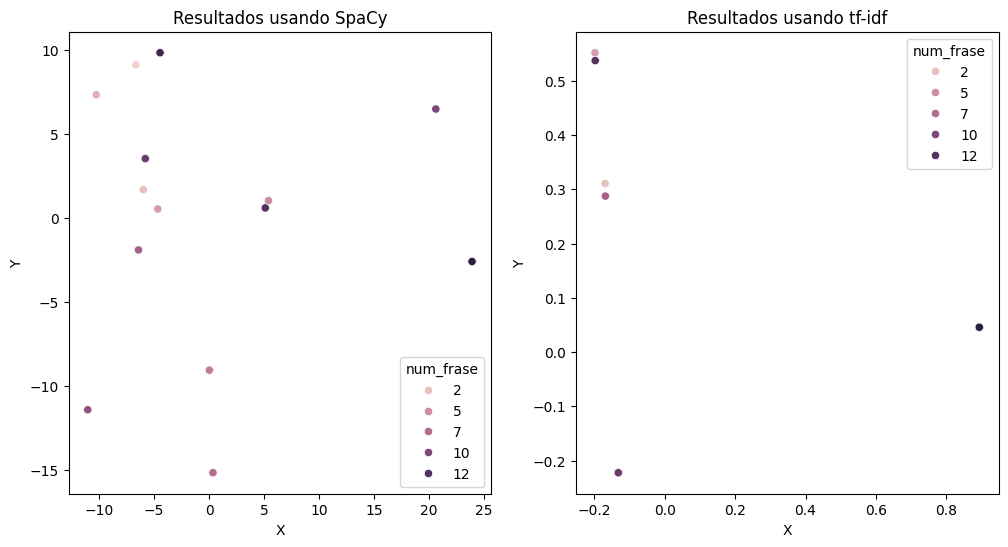

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(df_usando_spacy, x= 'X', y='Y', hue= 'num_frase', ax=axs[0])
#.scatterplot(data=df_graficar, x='d1',y='d2',hue = 'num_frase')
sns.scatterplot(df_tfidf, x= 'X', y='Y', hue= 'num_frase', ax=axs[1])

axs[0].set_title('Resultados usando SpaCy')
axs[1].set_title('Resultados usando tf-idf')

Vemos que en este caso es mejor ocupar Spacy por verso que ocupar tf-idf, porque así se representan más versos que en el otro. 